In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("catfish_wide_unit1.csv")

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True) #set date as index
x=df[df.columns[0:1]]
y=df[df.columns[1:2]]
x=x.rename(columns={'CatfishFarm Price': 'Price'})
y=y.rename(columns={'CatfishProcessor Price': 'Price'})

# SEASONAL TREND

In [4]:
#x=np.log(x)

In [5]:
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary
import math
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

no display found. Using non-interactive Agg backend


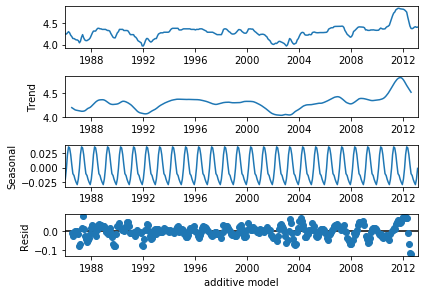

In [6]:
df=x
sd_add=seasonal_decompose(df,model='additive')
sd_add.plot()
plt.xlabel('additive model')
plt.show()

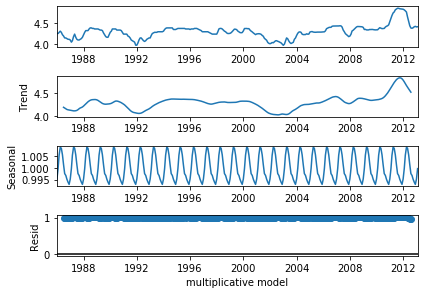

In [7]:
df=x
sd_mul=seasonal_decompose(df,model='multiplicative')
sd_mul.plot()
plt.xlabel('multiplicative model')
plt.show()

In [8]:
# Create Training and Test
df=x
n=len(df)
ntra=302
ntes=n-ntra # 2 years
train = df[:ntra]
test = df[ntra:]

# Trend

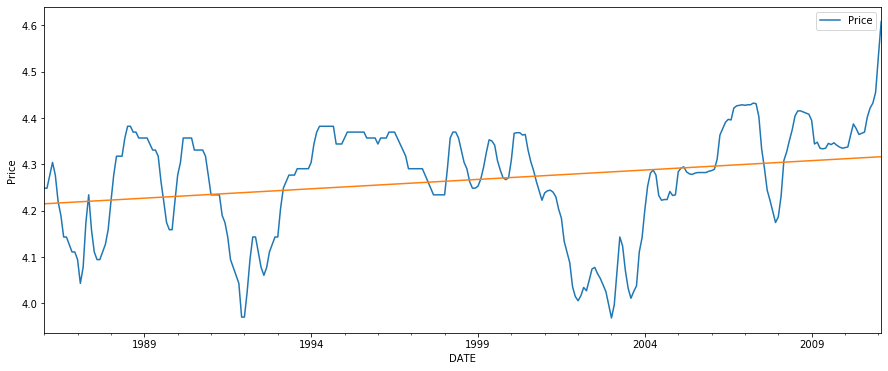

In [9]:
train_df=tsatools.add_trend(train,trend='ct')
train_lm=sm.ols(formula='Price ~ trend',data=train_df).fit()
ax = train.plot(figsize=(15,6))
ax.set_xlabel('Time')
ax.set_ylabel("Price")
train_lm.predict(train_df).plot(ax=ax)
plt.show()

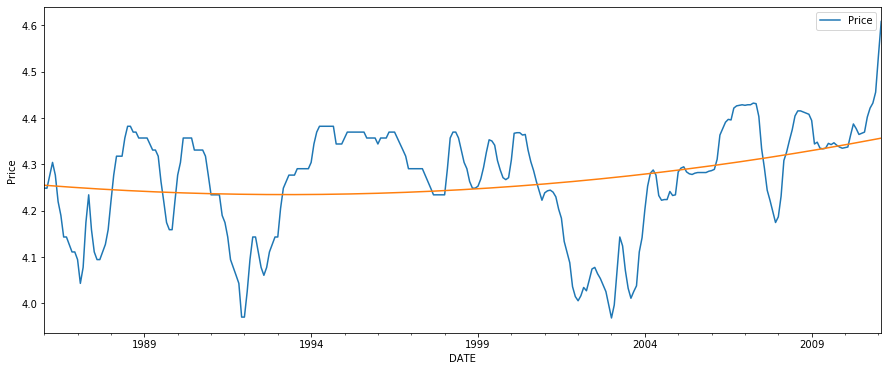

In [10]:
train_df=tsatools.add_trend(train,trend='ctt')
train_lm=sm.ols(formula='Price ~ trend+trend_squared',data=train_df).fit()
ax = train.plot(figsize=(15,6))
ax.set_xlabel('Time')
ax.set_ylabel("Price")
train_lm.predict(train_df).plot(ax=ax)
plt.show()

# Seasonal trend

In [11]:
strain = tsatools.add_trend(train, trend='c')
strain['Month'] = strain.index.month

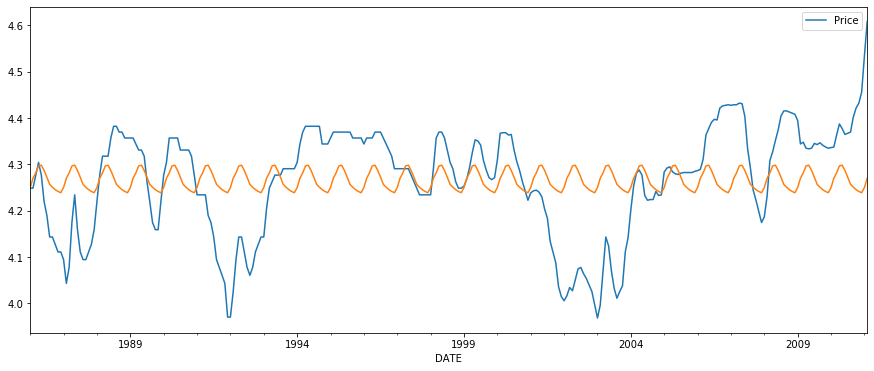

In [12]:
train_season = sm.ols(formula='Price~ C(Month)',data=strain).fit()
ax = train.plot(figsize=(15,6))
train_season.predict(strain).plot(ax=ax)
plt.show()

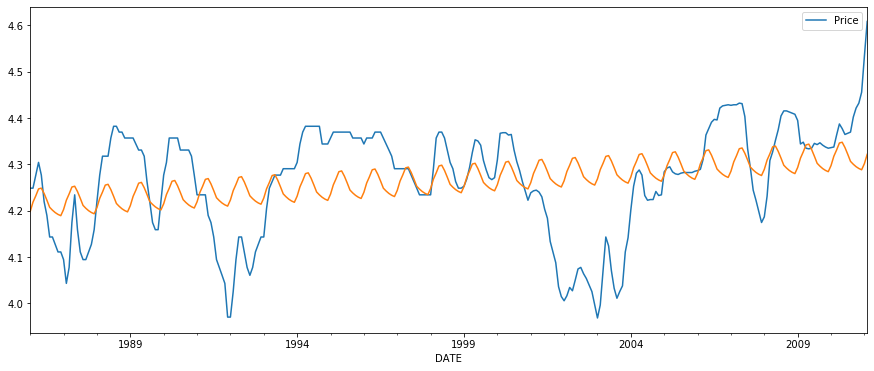

In [13]:
st_train = tsatools.add_trend(train, trend='ct')
st_train['Month'] = st_train.index.month
train_trendseason= sm.ols(formula='Price~ trend + C(Month)',data=st_train).fit()
ax = train.plot(figsize=(15,6))
train_trendseason.predict(st_train).plot(ax=ax)
plt.show()

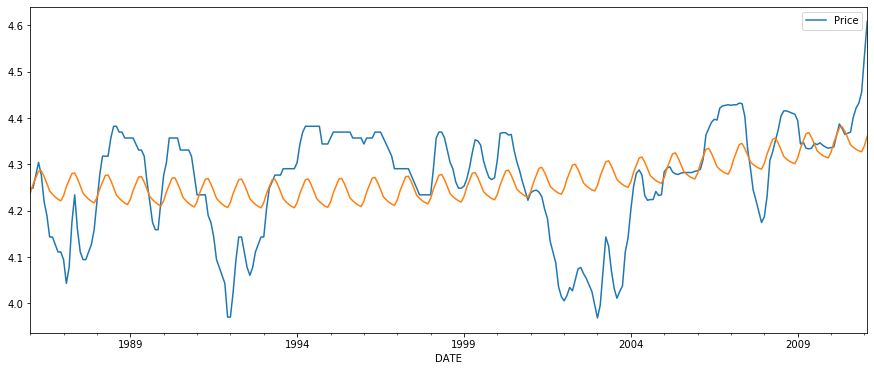

In [14]:
st_train = tsatools.add_trend(train, trend='ctt')
st_train['Month'] = st_train.index.month
train_trendseason= sm.ols(formula='Price~ trend + np.square(trend)+ C(Month)',data=st_train).fit()
ax = train.plot(figsize=(15,6))
train_trendseason.predict(st_train).plot(ax=ax)
plt.show()

In [15]:
residual=train_trendseason.resid # residual 
trend=train_trendseason.predict(st_train)
res_trend=residual+trend

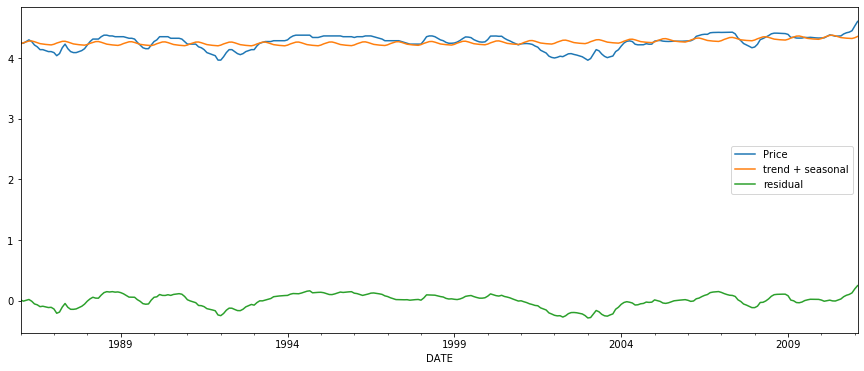

In [16]:
ax=train.plot(figsize=(15,6))
#res_trend.plot(ax=ax)
trend.plot(ax=ax,label='trend + seasonal')
residual.plot(ax=ax,label='residual')
plt.legend()
plt.show()

## predict seasonal trend

In [17]:
s_df = tsatools.add_trend(x, trend='ctt')
s_df['Month'] = s_df.index.month
trend_df=train_trendseason.predict(s_df)

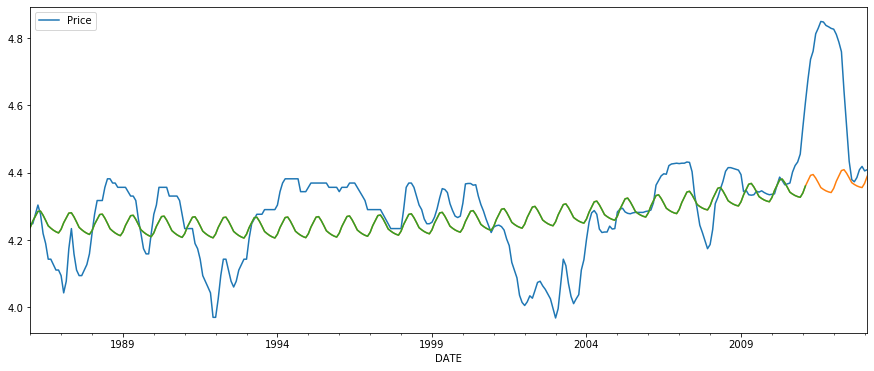

In [18]:
fig,ax=plt.subplots(figsize=(15,6))
df.plot(ax=ax)
trend_df.plot(ax=ax)
trend.plot(ax=ax)
plt.show()

In [19]:
trend_test=trend_df.iloc[ntra:]
trend_train=trend_df.iloc[:ntra]

## Fitting residual


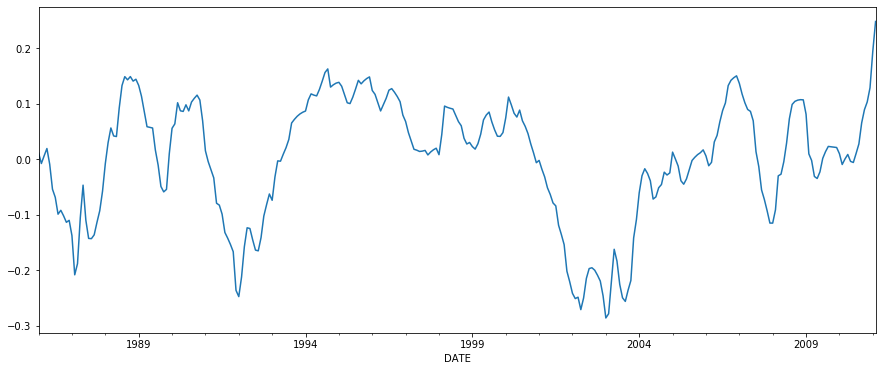

In [20]:
residual.plot(figsize=(15,6))
plt.show()

In [21]:
#trend {‘c’,’nc’}  ‘c’ includes constant, ‘nc’ no constant.
res=residual
res_model = ARIMA(res, order=(1, 0,1),freq='MS').fit(trend='nc')

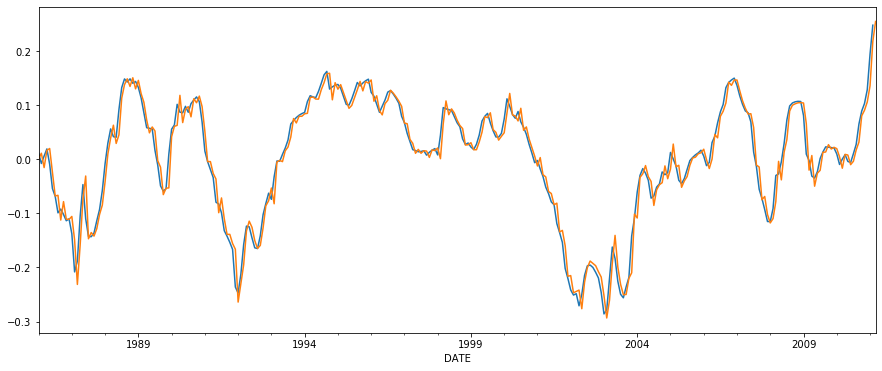

In [22]:
ax=res.plot(figsize=(15,6))
#res_arima.fittedvalues.plot(ax=ax)
predict=res_model.predict(start=0,end=ntra)
predict.plot(ax=ax)
plt.show()

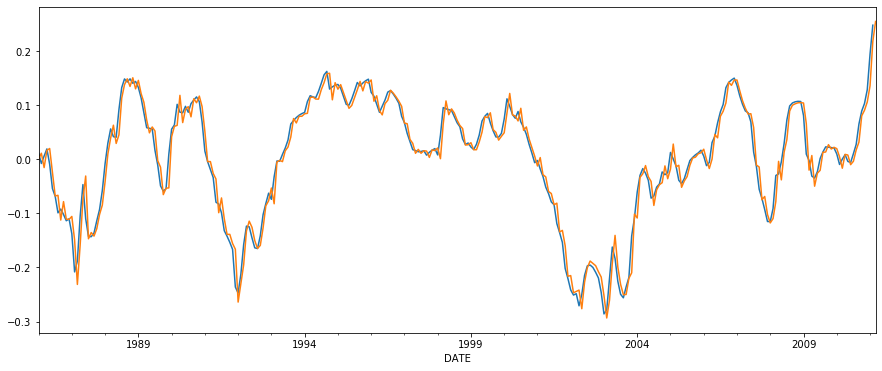

In [23]:
ax=res.plot(figsize=(15,6))
#res_arima.fittedvalues.plot(ax=ax)
predict=res_model.predict(start=0,end=ntra)
predict.plot(ax=ax)
plt.show()

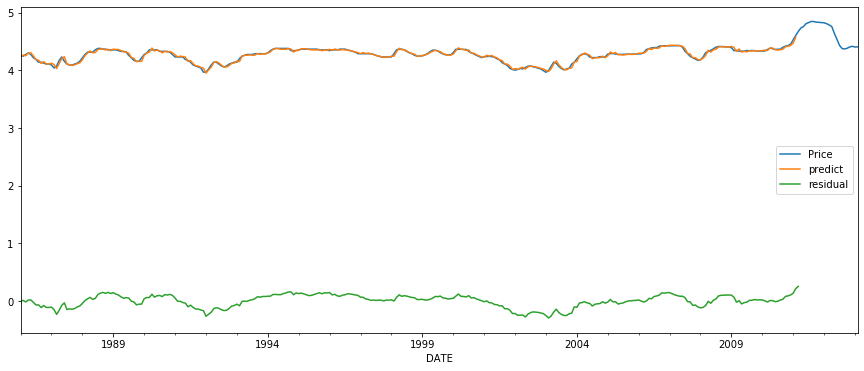

In [24]:
df=x
ax=df.plot(figsize=(15,6),label='actual')
#res_arima.fittedvalues.plot(ax=ax)
pre_res=res_model.predict(start=0,end=ntra)
fc=trend_train+pre_res
fc.plot(ax=ax,label='predict')
pre_res.plot(ax=ax,label='residual')
plt.legend()
plt.show()

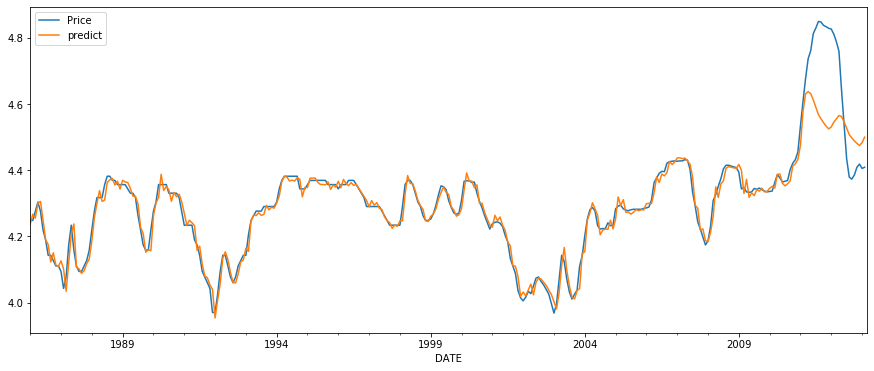

In [25]:
df=x
ax=df.plot(figsize=(15,6),label='actual')
#res_arima.fittedvalues.plot(ax=ax)
pre_res=res_model.predict(start=0,end=n)
fc=trend_df+pre_res
fc.plot(ax=ax,label='predict')
plt.legend()
plt.show()

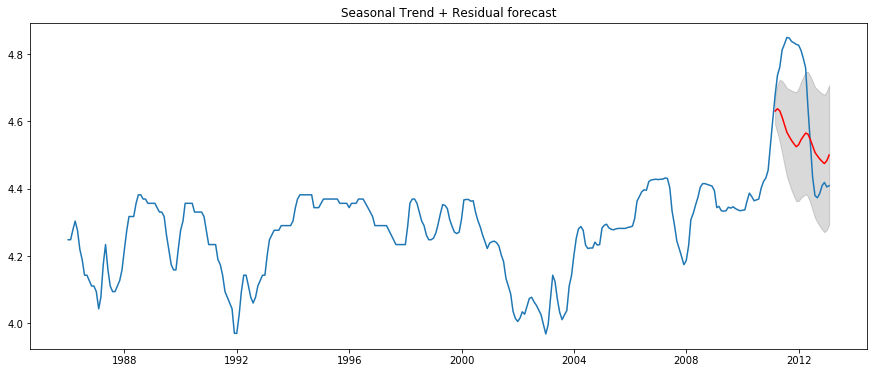

In [26]:
df=x
forecast, stderr, confint = res_model.forecast(n-ntra)

index_of_fc = test.index

# make series for plotting purpose
fitted_series = pd.Series(forecast+trend_test, index=index_of_fc)
lower_series = pd.Series(confint[:, 0]+trend_test, index=index_of_fc)
upper_series = pd.Series(confint[:, 1]+trend_test, index=index_of_fc)

# Plot
fig,ax=plt.subplots(figsize=(15,6))
plt.plot(df)
#plt.plot(x,color='blue')
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Seasonal Trend + Residual forecast")
#plt.savefig('SeasonalTrend.png')
plt.show()

# OPTIMAL ARIMA FOR RESIDUAL

In [27]:
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy import log
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from dateutil.parser import parse


import pmdarima as pm
%matplotlib inline

In [28]:
train_res=residual

In [29]:
model = pm.auto_arima(train_res, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-1480.858, BIC=-1466.030, Time=0.454 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-1384.094, BIC=-1376.680, Time=0.078 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-1475.710, BIC=-1464.588, Time=0.196 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-1472.815, BIC=-1461.693, Time=0.187 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-1385.775, BIC=-1382.068, Time=0.057 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-1479.470, BIC=-1460.935, Time=0.591 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-1480.004, BIC=-1461.468, Time=0.831 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=-1481.933, BIC=-1467.104, Time=0.329 seconds
Fit ARIMA(0,1,3)x(0,0,0,0) [intercept=True]; AIC=-1480.032, BIC=-1461.497, Time=0.927 seconds
Fit ARIMA(1,1,3)x(0,0,0,0) [intercept=True]; AIC=-1477.971, BIC=-1455.728, Time=0.837 seconds
Total fit time: 

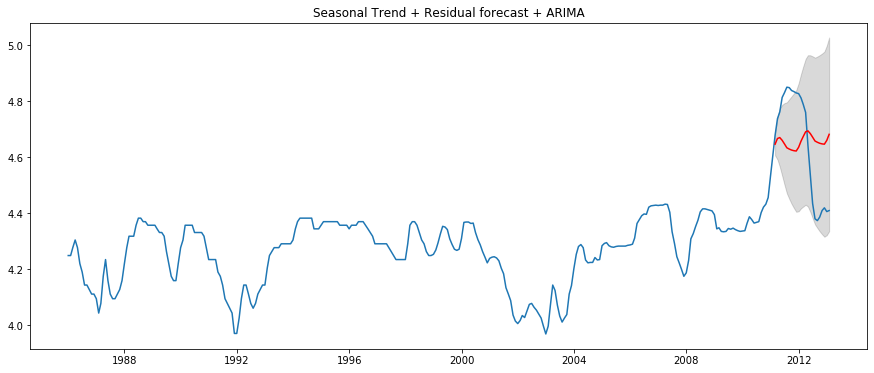

In [30]:
df=x
#forecast, stderr, confint = model.forecast(n-ntra)
forecast,confint=model.predict(n_periods=ntes, return_conf_int=True)

index_of_fc = test.index

# make series for plotting purpose
fitted_series = pd.Series(forecast+trend_test, index=index_of_fc)
lower_series = pd.Series(confint[:, 0]+trend_test, index=index_of_fc)
upper_series = pd.Series(confint[:, 1]+trend_test, index=index_of_fc)

# Plot
fig,ax=plt.subplots(figsize=(15,6))
plt.plot(df)
#plt.plot(x,color='blue')
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Seasonal Trend + Residual forecast + ARIMA")
#plt.savefig('SeasonalTrendARIMA.png')
plt.show()

In [31]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train_res, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=-1375.569, BIC=-1357.219, Time=15.416 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=-388.390, BIC=-381.050, Time=0.291 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=-1185.877, BIC=-1171.197, Time=6.575 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=-759.022, BIC=-744.343, Time=4.562 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=-389.888, BIC=-386.218, Time=0.078 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=-1199.149, BIC=-1184.470, Time=1.881 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=-1373.543, BIC=-1351.523, Time=17.775 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=-1371.410, BIC=-1349.390, Time=57.131 seconds
Near non-invertible roots for order (1, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  302
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 697.630
Date:                            Sun, 17 May 2020   AIC                          -1383.260
Time:                                    18:43:13   BIC                          -1361.241
Sample:                                         0   HQIC                         -1374.438
                                            - 302                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.172e-05      0.000      0.196      0.845      -0.000       0.000
ar.L1          1.2868      0.083     15.565      0.000       1.125       1.449
ar.L2         -0.3420      0.081     -4.247      0.000      -0.500      -0.184
ma.L1          0.2797      0.084      3.313      0.001       0.114       0.445
ma.S.L12      -0.9679      0.158     -6.122      0.000      -1.278      -0.658
sigma2         0.0004   6.59e-05      6.415      0.000       0.000       0.001
===================================================================================
Ljung-Box (Q):                       38.06   Jarque-Bera (JB):                35.84
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.06
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

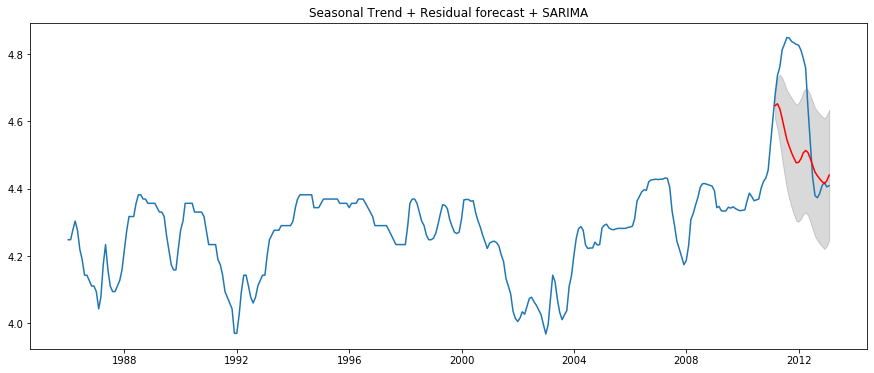

In [32]:
df=x
#forecast, stderr, confint = model.forecast(n-ntra)
forecast,confint=smodel.predict(n_periods=ntes, return_conf_int=True)

index_of_fc = test.index

# make series for plotting purpose
fitted_series = pd.Series(forecast+trend_test, index=index_of_fc)
lower_series = pd.Series(confint[:, 0]+trend_test, index=index_of_fc)
upper_series = pd.Series(confint[:, 1]+trend_test, index=index_of_fc)

# Plot
fig,ax=plt.subplots(figsize=(15,6))
plt.plot(df)
#plt.plot(x,color='blue')
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Seasonal Trend + Residual forecast + SARIMA")
#plt.savefig('SeasonalTrendSARIMA.png')
plt.show()